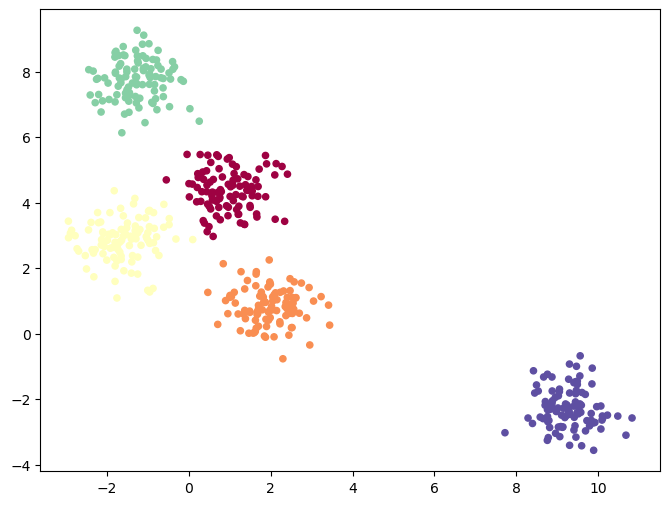

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)  

plt.show()

# Finding the best k 

## Elbow method

C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

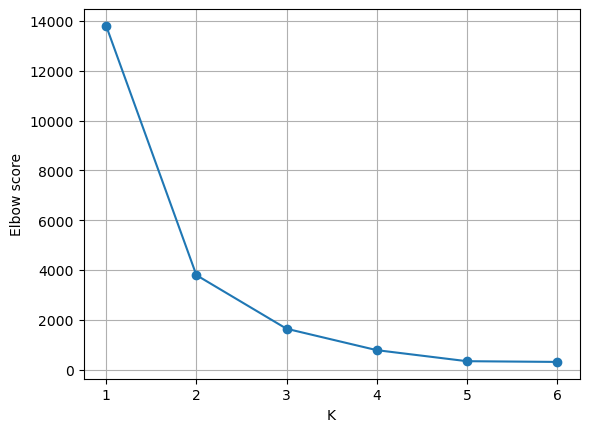

In [7]:
from sklearn.cluster import KMeans

k_values = range(1, 7)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.figure()
plt.plot(k_values, inertias, '-o')
plt.xlabel('K')
plt.ylabel('Elbow score')
plt.grid(True)
plt.show()


## Silhouette method

C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

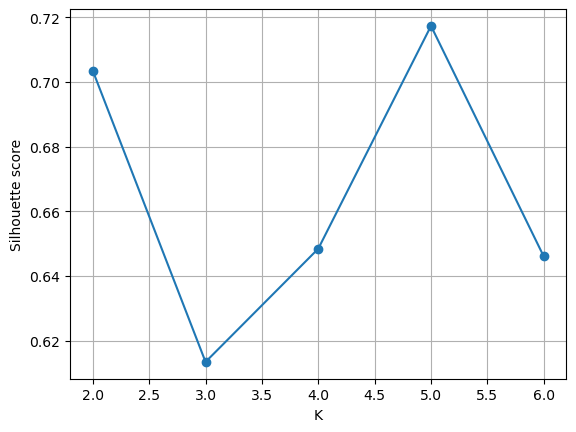

In [9]:
from sklearn.metrics import silhouette_score

silhouette_avg_scores = []
k_range = range(2,7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_avg_scores.append(score)

plt.figure()
plt.plot(k_range, silhouette_avg_scores, '-o')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()


# Conclusion
Elbow method says that the best k is 3. \
Silhouette method says that the best k is 5. \
But I gonna take the average - 4. Even thought correct is 5 (I pretend I don't know the actual number of clusters)

In [59]:
k = 4

# Agglomerative clustering using complete linkage

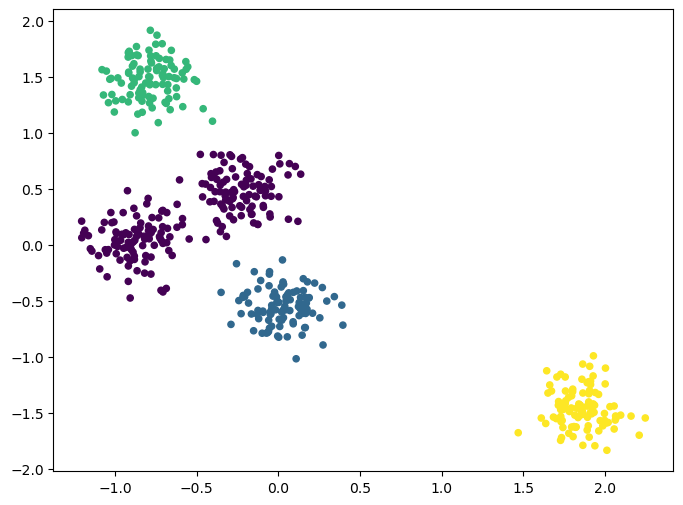

In [83]:
from sklearn.cluster import AgglomerativeClustering

claster = AgglomerativeClustering(n_clusters = k, linkage = 'complete')
predicted = claster.fit_predict(X)

plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c = predicted, s= 20)  

plt.show()

# Agglomerative clustering using single linkage

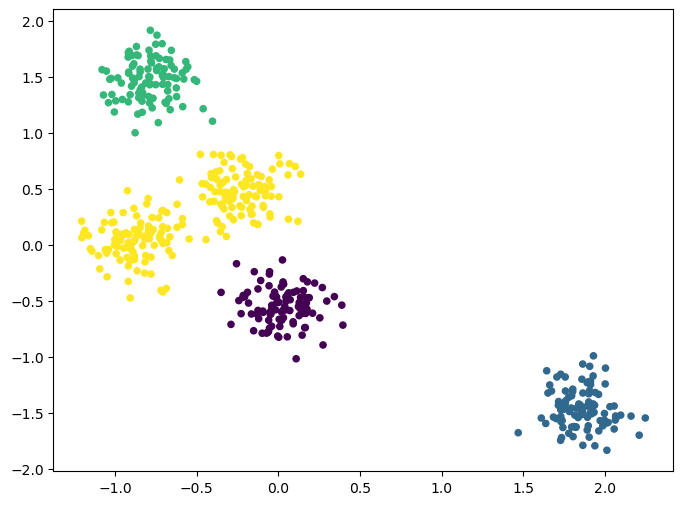

In [86]:
claster = AgglomerativeClustering(n_clusters = k, linkage = 'single')
predicted = claster.fit_predict(X)

plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c = predicted, s= 20)  

plt.show()

# DBSCAN (with manual grid search)

In [57]:
from sklearn.cluster import DBSCAN
from itertools import product

param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1],
    'min_samples': [3, 5, 10, 15]
}
param_combinations = list(product(param_grid['eps'], param_grid['min_samples']))

best_score = -1
best_params = None
best_labels = None

for eps, min_samples in param_combinations:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    
    # If there are only 1 cluster or only noise we skip these params
    if len(set(labels)) == 1:
        continue
    
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_params = {'eps': eps, 'min_samples': min_samples}
        best_labels = labels

print("Best paramaters:", best_params)
print("Best score:", best_score)

Best paramaters: {'eps': 0.6, 'min_samples': 10}
Best score: 0.6859368557936513


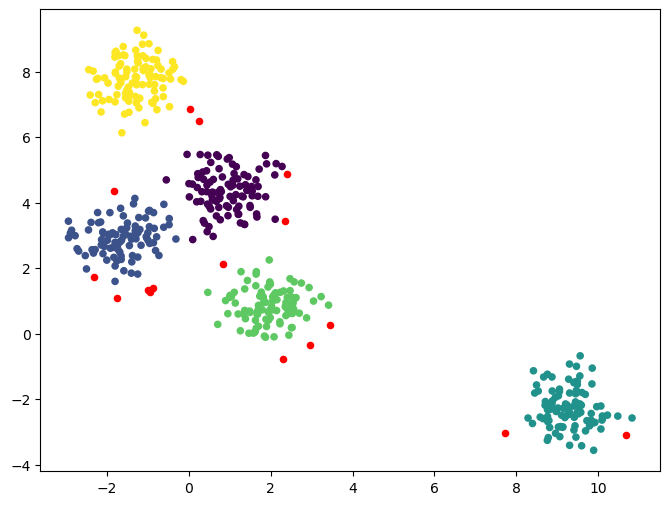

In [66]:
clusters = best_labels != -1
noise = best_labels == -1

plt.figure(figsize=(8, 6))

plt.scatter(X[clusters, 0], X[clusters, 1], c=best_labels[clusters], s=20)

plt.scatter(X[noise, 0], X[noise, 1], c='red', s=20)

plt.show()
